## Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Обзор данных

In [2]:
data = pd.read_csv('real_estate_data.csv', delimiter='\t')

data.info()

data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Данные явно неполные, есть недостаток значений в колонках "Высота потолков", "Общее количество этажей в доме", "Жилая площадь", "Аппартамменты", "Площадь кухни", "Количество балконов", "Название населенного пункта", "Расстояние до аэропорта" и "до центра", а также данные по паркам и водоемам, и по количетву дней размещения.

Кроме того, что-то странное с типами данных. `is_apartment` не булев тип, хотя должен им быть, некоторые целые числа отмечены как числа с плавающей запятой, формат времени тоже надо поменять.

Одно название колонок не соответствует правилам стиля `cityCenters_nearest`.

Посчитаем количество NaN значений.

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Теперь посмотрим на описательные статистики по данным.

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Для наглядности построим гистограммы по данным.

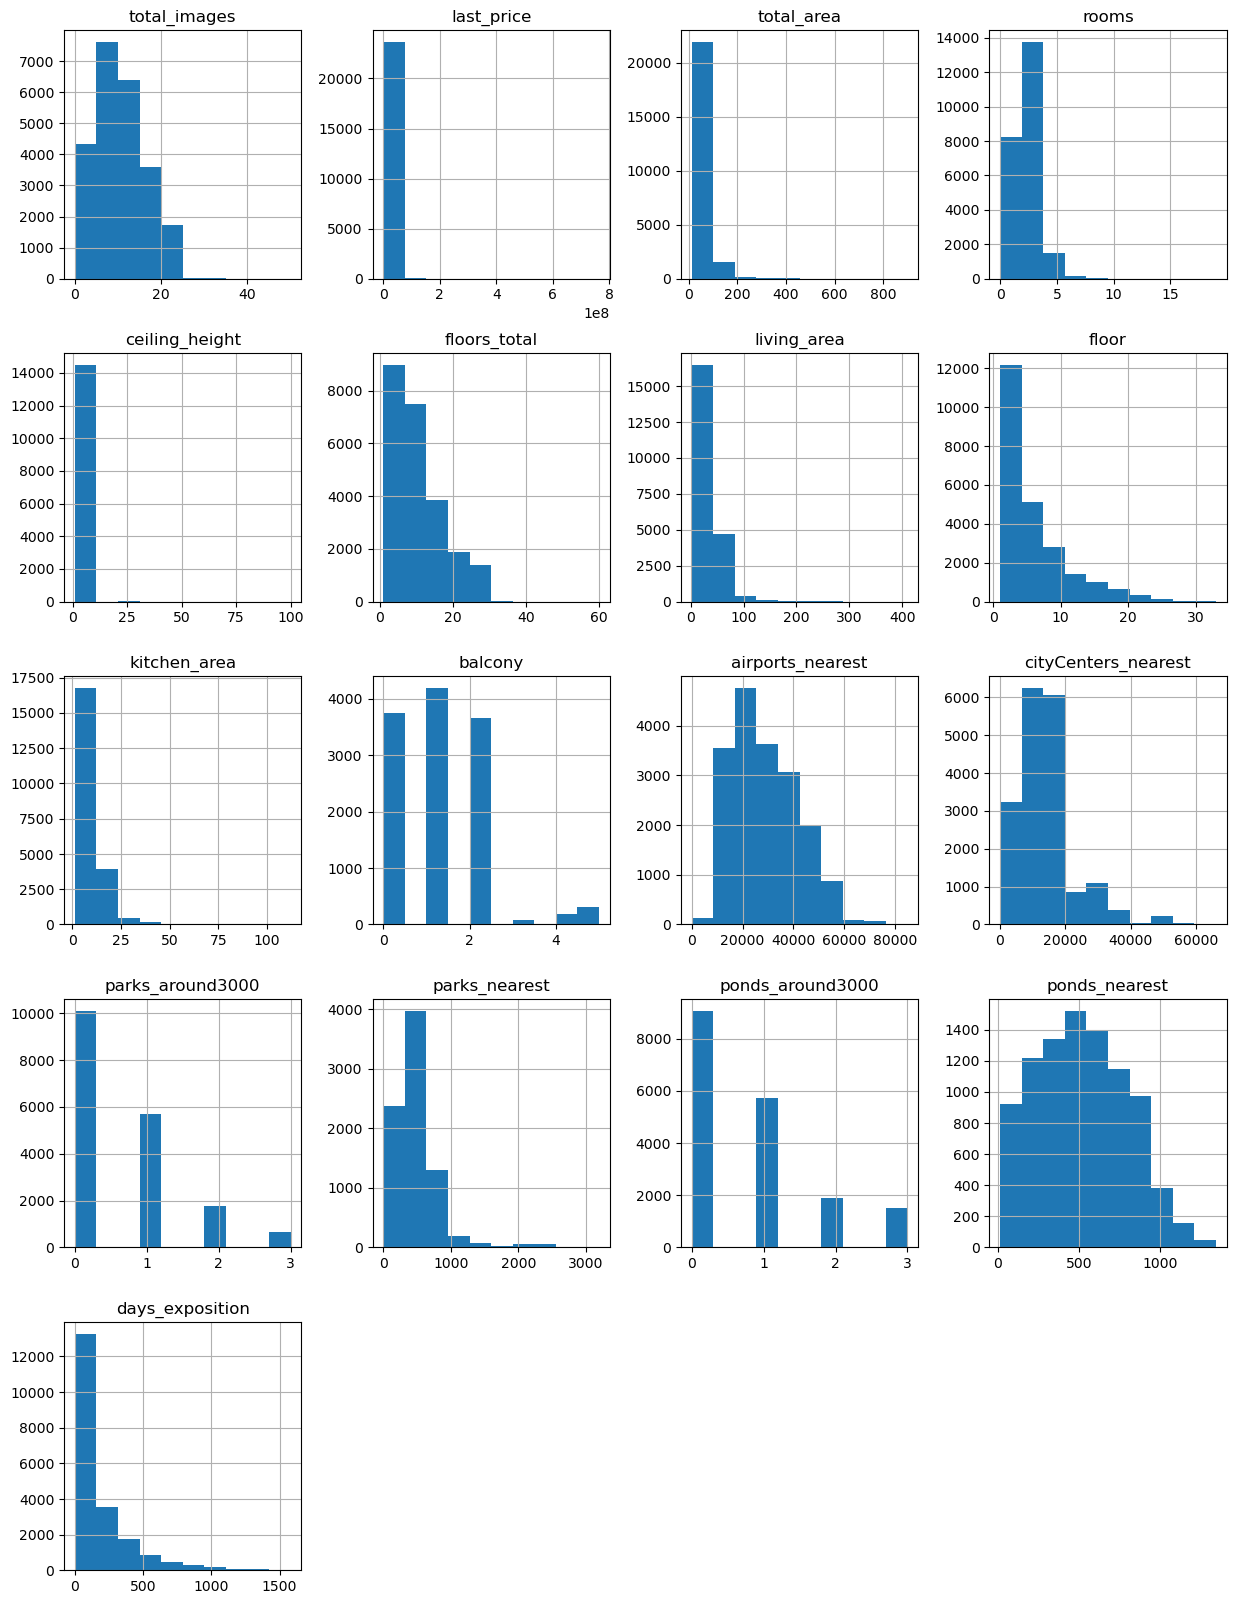

In [5]:
data.hist(figsize=(15, 20));

Видно, что, в основном, распределение всех данных не соответствует нормальному. За исключением количества фотографий и ближайших прудов. Для остальных данных распределение близко к распределению Пуассона, что ожидаемо, так как всегда есть длинный "хвост" квартир (в основном из премиум сегмента) с необычно большим количеством комнат, ценой, площадью и т.п.

Посмотрим, какие значения принимает столбец `is_apartment`, чтобы проверить, нет ли там неверных типов данных, помимо пропущенных значений.

In [6]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Видим, что значения написаны правильно, просто большая часть пропущена.

**Вывод**: Изучив общую информацию по данным мы обнаружили, что в данных есть проблемы. Некорректные типы данных, отсутствующие значения, а также выбросы - это то, что мы обнаружили.

### Предобработка данных

#### Переименования столбцов

Название столбца `cityCenters_nearest` не соотвтетствует правилам стиля, исправим это.

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### Обработка пропусков - 1

Начнем с обработки пропусков. Взглянем еще раз на их количество.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0: 'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Процент пропущенных значений в данных' + '\n', fontsize = 22)    
        );    
    except:
        print('Пропусков не осталось')

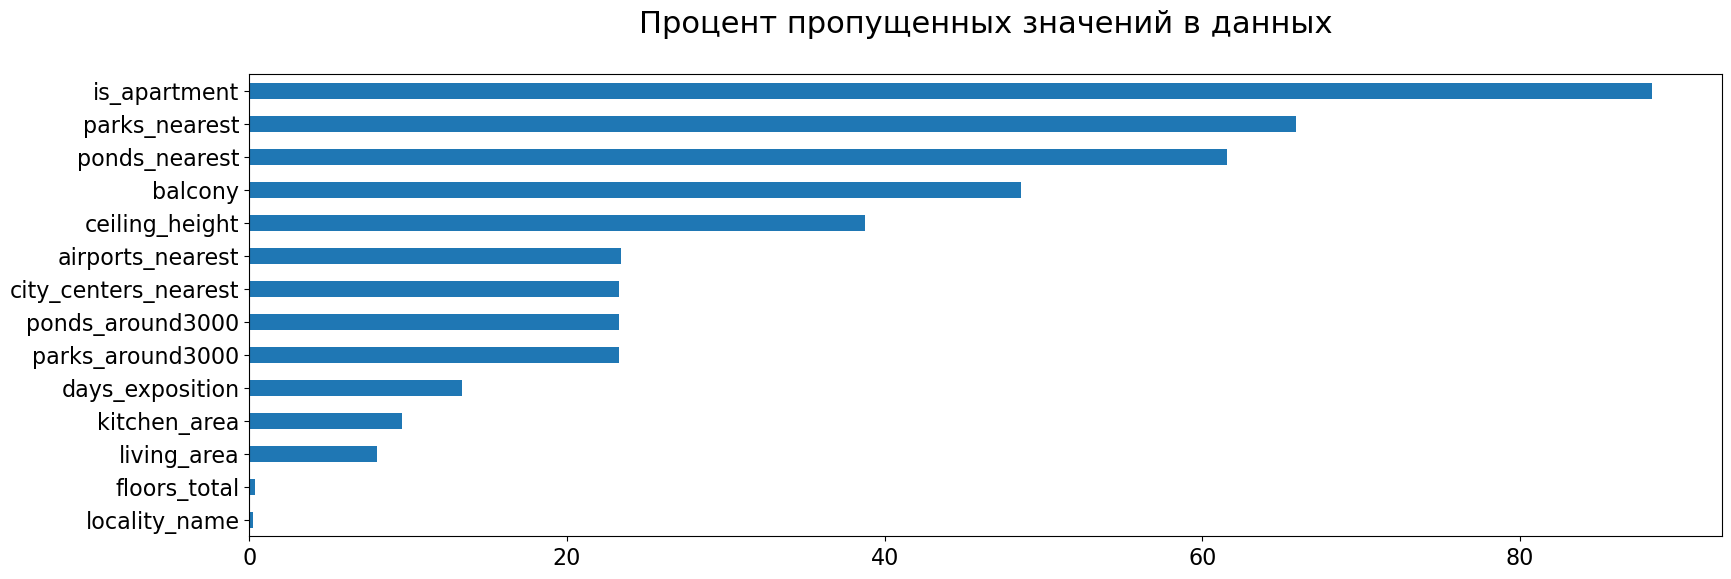

In [10]:
pass_value_barh(data)

Логично предположить, что если не указана принадлежность квартиры к апартаментам `is_apartment`, то это не апартаменты. Аналогично с количеством балконов `balcony`, если оно не указано, то их просто нет.  Длительность размещения объявления `days_exposition` может быть не заполнена, если оно было доступно менее 1 дня. Эти пропуски мы просто заполним, проверить наши предположения по имеющимся данным невозможно.

Возможно, что если не указано количество этажей `floors_total`, то дом не многоэтажный. А также, если не указана площадь кухни `kitchen_area`, возможно, это квартира-студия, где кухни нет. Аналогично с жилой площадью `living_area`, возможно, она не указана в апартаментах, которые не считаются жилым помещением. Эти пропуски мы можем заполнить после проверки наших предположений, данным нам хватит.

Непонятно, почему владелец не указал высоту потолков `ceiling_height`, а также название населенного пункта `locality_name`. С этими пропусками мы ничего сделать не сможем.
 
---
 
В катрографических данных тоже много пропусков. Расстояния до ближайших мест (аэропорт `airports_nearest`, парк `parks_nearest`, водоем `ponds_nearest`, центр города `cityCenters_nearest`) мы никак посчитать не можем, так как других картографических данных у нас нет. 

А вот заполнить неуказанные количество парков `parks_around3000` и водоемов `ponds_around3000` в радиусе 3 км можно, если предположить, что этих объектов на таком расстоянии просто нет.

---

Заполним все пропуски в столбце `is_apartment` на `False`, а в столбцах `balcony`, `days_exposition`, `parks_around3000` и `ponds_around3000` на `0`.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(value='False')
data[['balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']] = (
    data[['balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']]
    .fillna(value=0))

Теперь изучим данные, чтобы доказать или опровергнуть наши предположения.

Вначале проверим, во скольких квартирах, продающихся на 1 этаже, не указана общая этажность дома.

In [12]:
print('Всего квартир на 1 этаже:', data[data['floor'] == 1]['floors_total'].count())
data[data['floor'] == 1]['floors_total'].isna().sum()

Всего квартир на 1 этаже: 2914


3

Этаж не указан только в 3 случаях из 2914 квартир. А всего пропусков 86. Значит, наше предположение неверно. Скорее всего, мы никак не сможем заполнить эти пропуски.

Теперь посмотирм, во скольких квартирах студиях не указана площадь кухни.

In [13]:
print('Всего студий:', data['studio'].sum())
data[data['studio'] == True]['kitchen_area'].isna().sum()

Всего студий: 149


149

Во всех 149 студиях не указана площадь кухни. Надо заменить все значения площади кухни в студиях на 0, наше предположение частично подтвердилось. Однако, всего площадь кухни не указана в 2278 объявлениях, то есть наше заполнение затронет меньше 10% всех пропусков.

Возможно, стоит оставить пропуски в данных, просто в дальнейшем будем знать, что в студиях площадь кухни не указывается.

Осталось посмотреть, во скольких апартаментах не указана жилая площадь. Сейчас у этих данных неверный тип, вначале надо поменять его на булев. Сделаем это и затем проверим наше последнее предположение.

#### Изменение типов данных

Мы видели, что дата публикации объявления находится в типе `object`, а не во временном `datetime`. Кроме того кажется странным, что число этажей `floors_total`, балконов `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition` - это не целые числа, хотя эти числа не могут иметь десятичную часть, а `is_apartment` - не булев тип данных (хотя в описании к даным четко написано, что это должны быть логические данные).

Начнем с последнего, так как это единственный булев тип, который надо сделать. Для этого нам надо заменить все False на 0, а True на 1. 

In [14]:
data['is_apartment'] = data['is_apartment'].replace('False', 0).replace('True', 1)
data['is_apartment'] = data['is_apartment'].astype('bool')

Теперь заменим тип данных в числовых колонках на целые числа. Так как мы смогли полностью заполнить только 4 колонки из 5 (`floors_total` осталась недозаполненной), то и заменить тип данных с сохранением NaN значений получится только в 4 колонках.

In [15]:
data[['days_exposition', 'balcony', 'parks_around3000', 'ponds_around3000']] = (
    data[['days_exposition', 'balcony', 'parks_around3000', 'ponds_around3000']]
    .astype('int'))

Остальсь изменить тип столбца `first_day_exposition` (дата публикации) на `datetime`.

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, что все типы данных изменены.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Вывод**: были изменены типы данных у 4 колонок, содержащих целые числа, время приведено к формату `datatime`, логические данные приведены в соответствие с данным нам описанием.

#### Обработка пропусков - 2

Проверим последнее предположение.

In [18]:
print('Всего апартаментов:', data['is_apartment'].sum())
data[data['is_apartment'] == True]['living_area'].isna().sum()

Всего апартаментов: 50


8

Видно, что наше предположение неверно. Апартаментов всего 50, и только в 8 из них не указана жилая площадь. Значит, с этими пропусками мы также ничего сделать не можем, оставим все как есть.

Проверим результат заполнения пропусков в данных.

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

**Вывод:** были изучены и обработаны пропуски в данных. Не получилось заполнить пропуски в добавленных пользователем столбцах высота потолков `ceiling_height`, количество этажей в здании `floors_total`, жилая площадь `living_area` и площадь кухни `kitchen_area`, название населенного пункта `locality_name`. Из картографических данных остались неполными расстояния до ближайшего аэропорта, центра города, парка и водоема (`airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, соответственно)

#### Устранение неявных дубликатов

В данных на 49 объявлениях не указан населенный пункт. Восстановить эту информацию никак не получится, поэтому просто избавимся от этих 49 объявлений. При общем количестве 23699 они не сильно повлияют на статистику.

In [20]:
data = data.dropna(subset = ['locality_name']).reset_index(drop=True)

In [21]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Для начала заменим все `ё` на `е`.

In [22]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

Теперь заменим все `городские поселки` на `поселки городского типа`, `поселки станций` на `поселки при железнодорожной станций` и `садовое товарищество` на `садовое некоммерческое товарищество`.

In [23]:
for elem in data['locality_name'].unique():
    if 'станции' in elem:
        for index in data[data['locality_name'] == elem].index:
            data.loc[index, 'locality_name'] = (data.loc[index, 'locality_name']
                                                .replace('поселок станции', 'поселок при железнодорожной станции'))
    if 'городской' in elem:
        for index in data[data['locality_name'] == elem].index:
            data.loc[index, 'locality_name'] = (data.loc[index, 'locality_name']
                                                .replace('городской поселок', 'поселок городского типа'))
    if 'садовое' in elem:
        for index in data[data['locality_name'] == elem].index:
            data.loc[index, 'locality_name'] = (data.loc[index, 'locality_name']
                                                .replace('садовое товарищество', 'садоводческое некоммерческое товарищество'))

Проверим полученные значения.

In [24]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

**Вывод**: избавились от неявных дубликатов в данных по населенным пунктам.

In [25]:
data['locality_name'].nunique()

321

#### Устранение редких и выбивающихся значений

Посмотрим еще раз на описательные статистики по данным.

In [26]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,156.448964
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,213.564548
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,73.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Подозрительными выглядят цифры в колонках с последней ценой, площадью, высотой потолков, жилой площадью и площадью кухни. Еще немного странные минимальные расстояния до аэропорта и парка - 0 и 1 м.

Взглянем подробнее на параметры квартир из объявления (не географические)

In [27]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format('{:,.2f}')
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,650.00","23,650.00","14,490.00","23,650.00","23,650.00","21,752.00","21,381.00","23,650.00","23,565.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [28]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format('{:,.2f}')
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,20.00,2.30,0.00,"561,894.00",10.00,3.77,1.00,2.00
0.010000,1.00,25.17,2.50,0.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.500000,2.00,52.00,2.65,73.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.990000,5.00,197.56,3.82,"1,044.02","36,000,000.00",120.00,35.06,23.00,26.00
0.998800,8.00,380.00,25.00,"1,361.62","124,803,024.00",219.80,60.00,26.00,35.00


Будем подробно рассматривать разные столбцы. Начем с `rooms`

In [29]:
data.rooms.value_counts().to_frame()

,rooms
1,8036
2,7924
3,5797
4,1175
5,326
0,197
6,105
7,59
8,12
9,8


Квартиры с количеством комнат более 7 редки, можно от них избавиться.

In [30]:
data = data[(data['rooms'] <= 7) | data['rooms'].isna()]

Смотрим на `total_area`

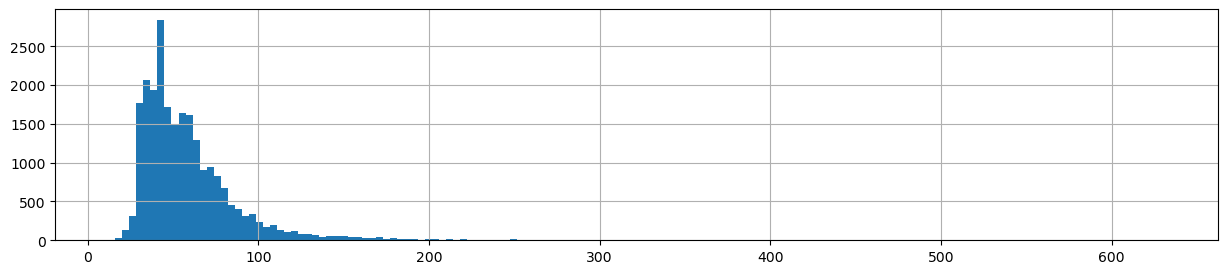

In [31]:
data.total_area.hist(bins = 150, figsize = (15, 3));

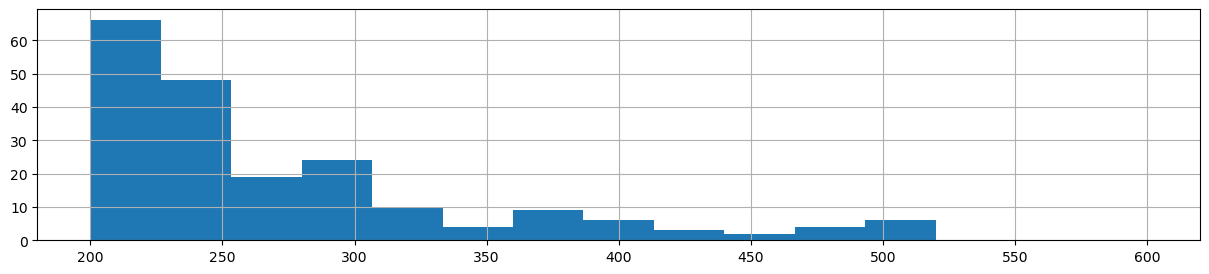

In [32]:
data.total_area.hist(bins = 15, figsize = (15, 3), range = (200, 600));

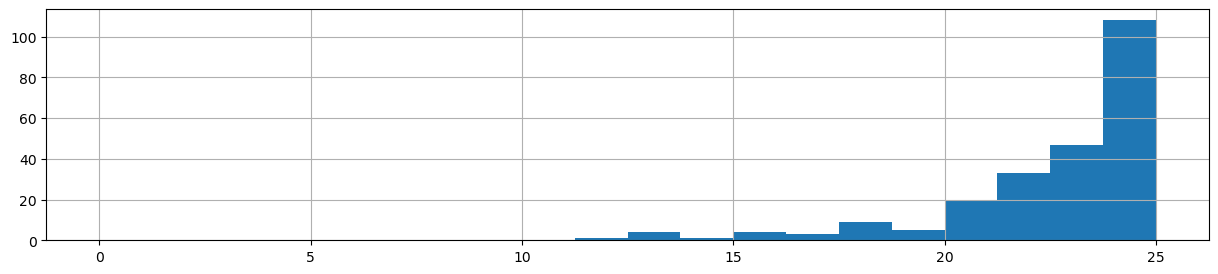

In [33]:
data.total_area.hist(bins = 20, figsize = (15, 3), range = (0, 25));

Квартиры с площадью менее 20 и более 200 квадратных метров являются редкими, и их можно удалить.

In [34]:
data = data[(data['total_area'] < 200) | data['total_area'].isna()]
data = data[(data['total_area'] > 20) | data['total_area'].isna()]


Посмотрим теперь на распределения по площади кухни. Оно могло измениться из-за наших действий.

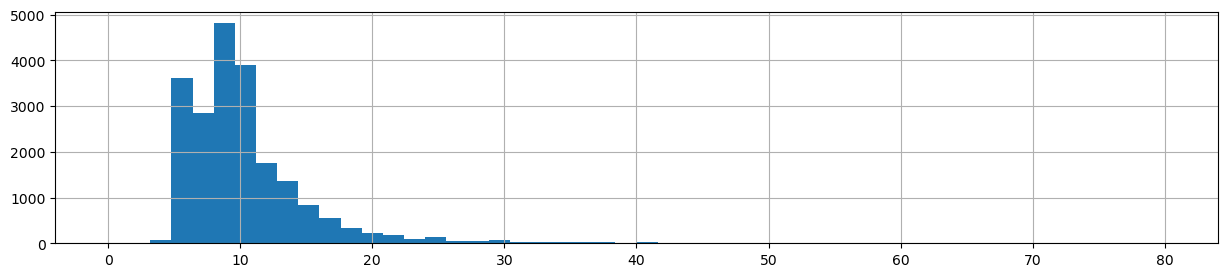

In [35]:
data.kitchen_area.hist(bins=50, figsize = (15, 3), range = (0, 80));

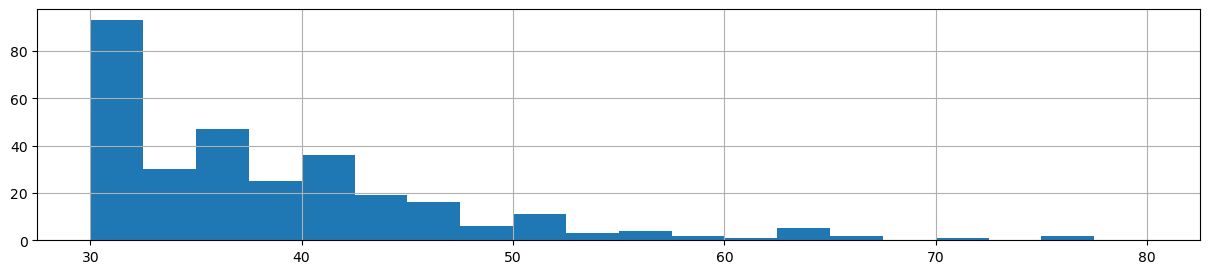

In [36]:
data.kitchen_area.hist(bins=20, figsize = (15, 3), range = (30, 80));

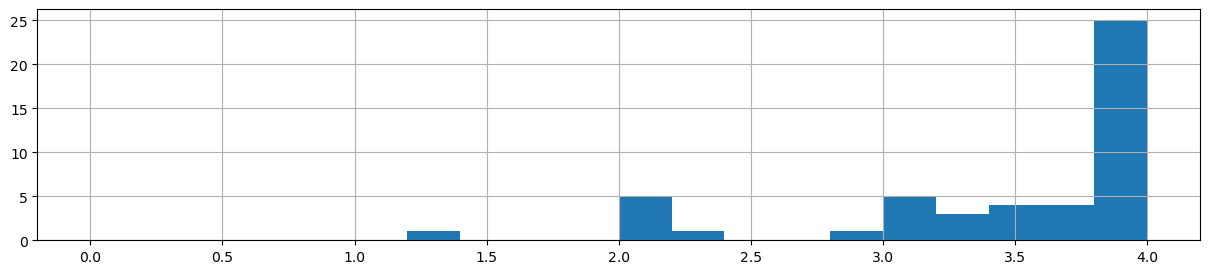

In [37]:
data.kitchen_area.hist(bins=20, figsize = (15, 3), range = (0, 4));

Квартиры с площадью кухни более 40 квадратных метров и менее 4 редкие, удалим их.

In [38]:
data = data[(data['kitchen_area'] <= 40) | data['kitchen_area'].isna()]
data = data[(data['kitchen_area'] >= 4) | data['kitchen_area'].isna()]

Смотрим на жилую площадь `living_area`

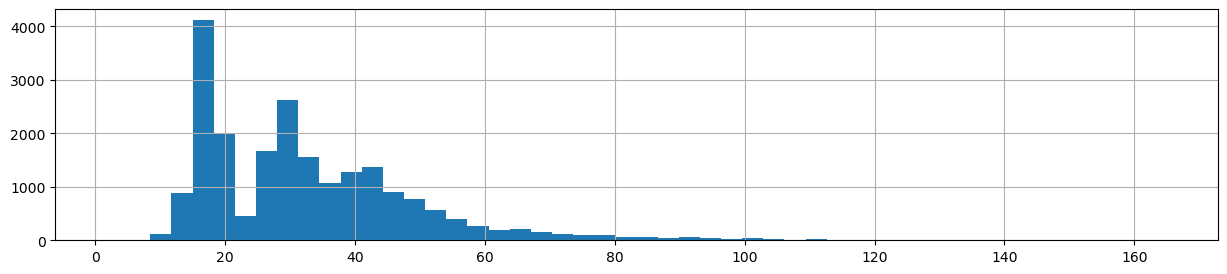

In [39]:
data.living_area.hist(bins=50, figsize = (15, 3));

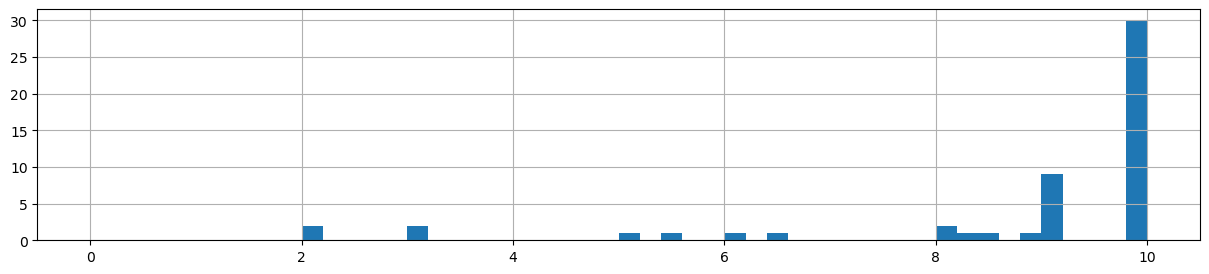

In [40]:
data.living_area.hist(bins=50, figsize = (15, 3), range=(0, 10));

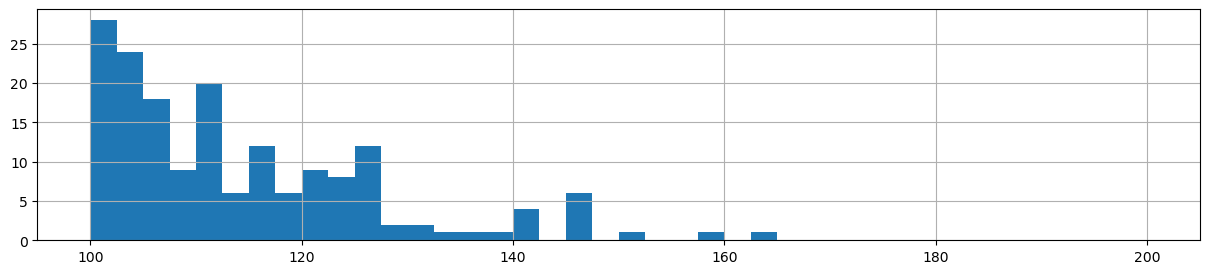

In [41]:
data.living_area.hist(bins=40, figsize = (15, 3), range=(100, 200));

Квартиры с жилой площадью менее 10 и более 100 квадратных метров редки, уберем их из рассчетов.

In [42]:
data = data[(data['living_area'] <= 100) | data['living_area'].isna()]
data = data[(data['living_area'] >= 10) | data['living_area'].isna()]

Посмотрим теперь на этаж и этажность дома.

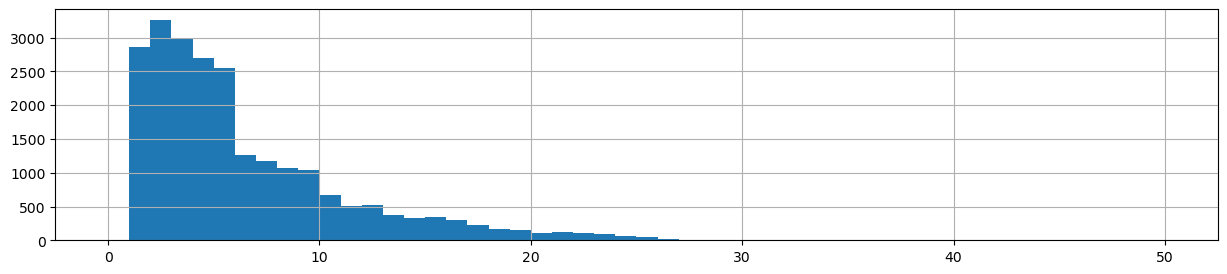

In [43]:
data['floor'].hist(bins=50, figsize = (15, 3), range=(0, 50));

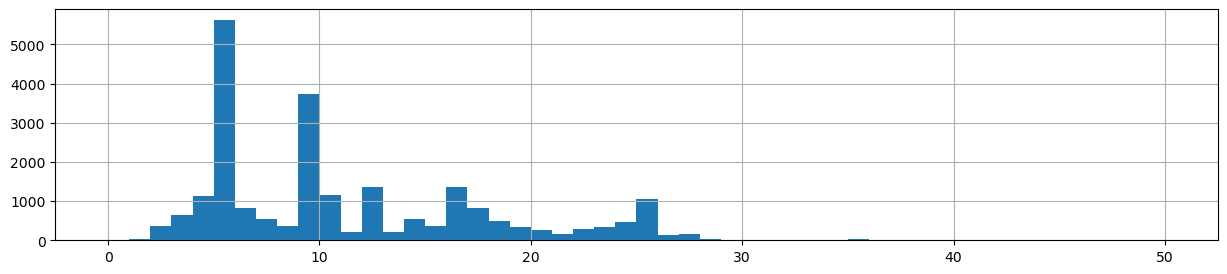

In [44]:
data['floors_total'].hist(bins=50, figsize = (15, 3), range=(0, 50));

Квартиры выше 25 этажа, а также в домах с числом этажей больше 30 - редкость.

In [45]:
data = data[data['floor'] <= 25]
data = data[data['floors_total'] <= 30]

Осталось разобраться с `ceiling_height`, `days_exposition` и `last_price`.

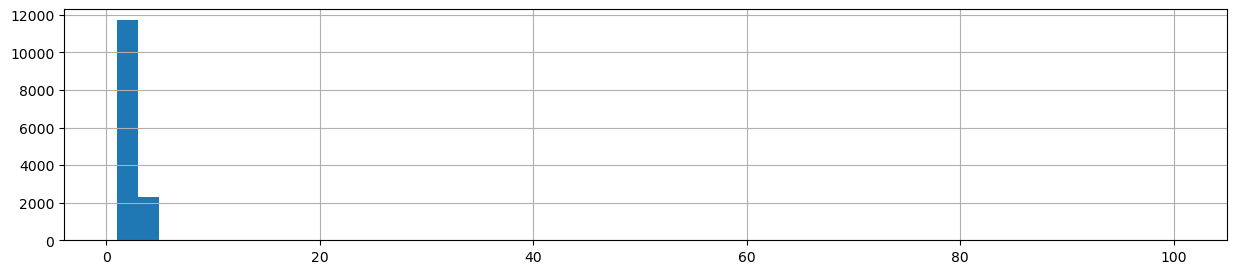

In [46]:
data['ceiling_height'].hist(bins=50, figsize = (15, 3));

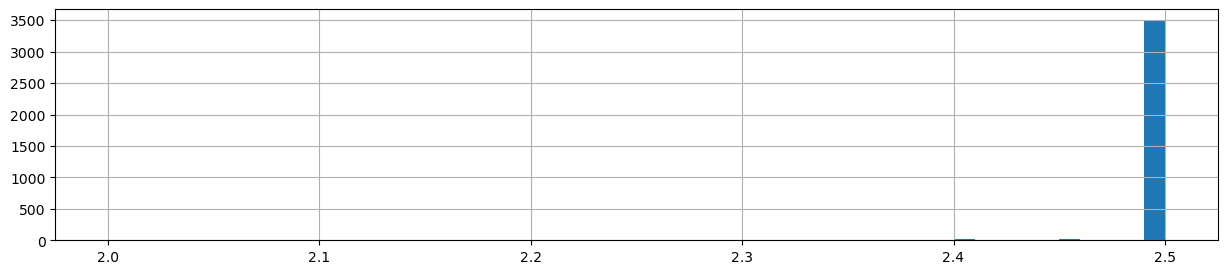

In [47]:
data['ceiling_height'].hist(bins=50, figsize = (15, 3), range=(2, 2.5));

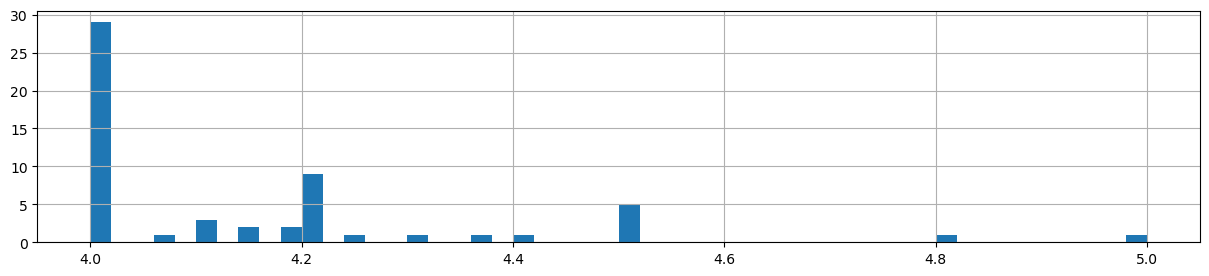

In [48]:
data['ceiling_height'].hist(bins=50, figsize = (15, 3), range=(4, 5));

Квартир с высотой потолка менее 2,4 и более 4 метров - единицы.

In [49]:
data = data[(data['ceiling_height'] < 4) | data['ceiling_height'].isna()]
data = data[(data['ceiling_height'] > 2.4) | data['ceiling_height'].isna()]

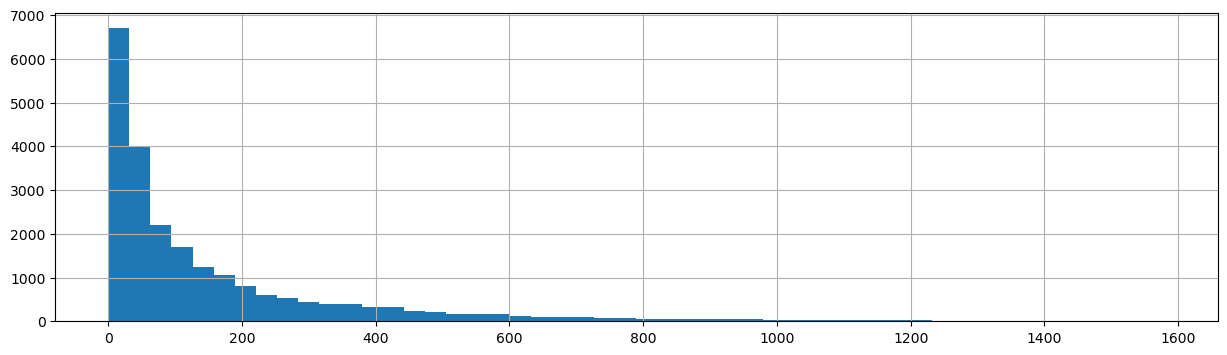

In [50]:
data['days_exposition'].hist(bins=50, figsize = (15, 4));

Не так уж и много квартир продаются больше 1000 дней.

In [51]:
data = data[data['days_exposition'] < 1000]

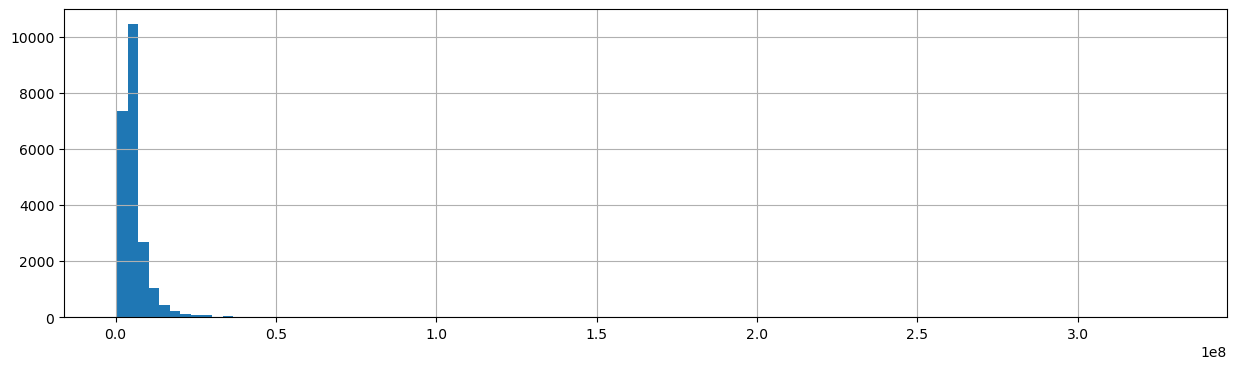

In [52]:
data['last_price'].hist(bins=100, figsize = (15, 4));

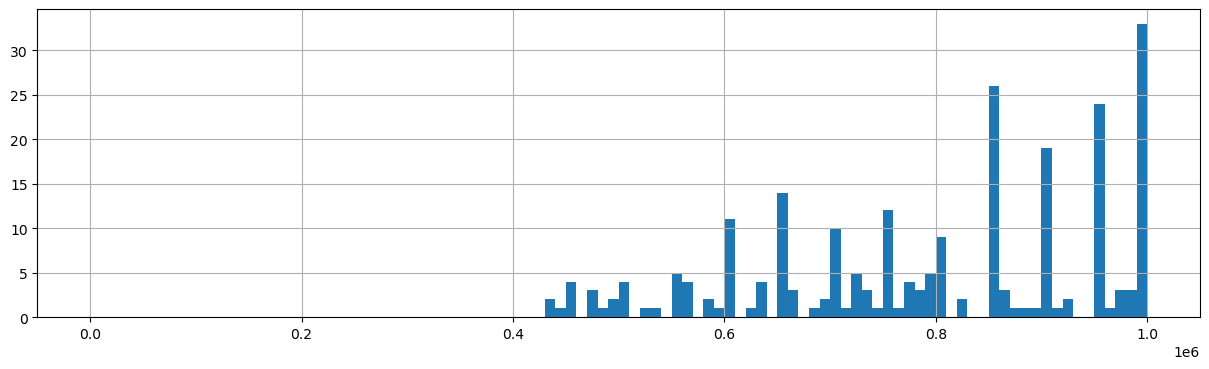

In [53]:
data['last_price'].hist(bins=100, figsize = (15, 4), range=(0, 1e6));

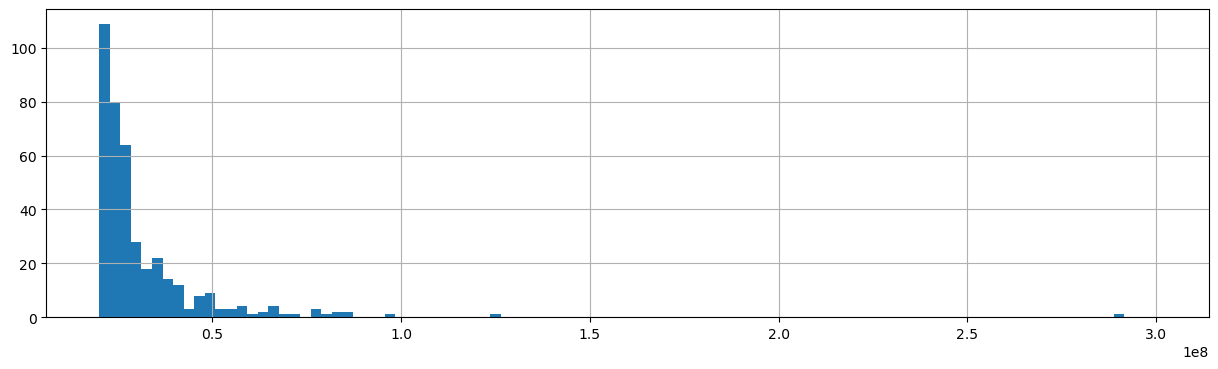

In [54]:
data['last_price'].hist(bins=100, figsize = (15, 4), range=(2e7, 3e8));

Квартир дешевле 600 000 и дороже 50 000 000 довольно мало.

In [55]:
data = data.query("600000 < last_price < 50000000")

Займемся картографическими данными. Посмотрим на значения расстояния до ближайшего аэропорта.

In [56]:
data['airports_nearest'].dropna().sort_values()

21045        0.0
12879     6450.0
4012      6450.0
7764      6914.0
23102     6949.0
          ...   
2970     81355.0
18851    81607.0
5210     83758.0
577      84665.0
5332     84853.0
Name: airports_nearest, Length: 17105, dtype: float64

Значение 0 выбивается, удалим его.

In [57]:
data = data.drop(21045)

Теперь посмотрим на значения расстояния до ближайшего парка.

In [58]:
data['parks_nearest'].dropna().sort_values()

14599       1.0
11930       3.0
22893       4.0
9328        7.0
2525        9.0
          ...  
23032    2984.0
19173    3013.0
1589     3064.0
19395    3190.0
10941    3190.0
Name: parks_nearest, Length: 7483, dtype: float64

Есть несколько маленьких значений, но, в целом, такие числа не выглядят нереально.

Посмотрим на итоговую статистику.

In [59]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22463.000000,2.246300e+04,22463.000000,22463.000000,13716.000000,22463.000000,20700.000000,22463.000000,20361.000000,22463.000000,17104.000000,17124.000000,22463.000000,7483.000000,22463.000000,8404.000000,22463.000000
mean,9.863064,5.676207e+06,56.847313,2.007657,2.705575,10.735209,32.419064,5.873971,10.105192,0.598540,28884.793849,14446.199311,0.451498,492.311239,0.566131,526.168372,143.429284
std,5.638609,4.182787e+06,23.900891,0.953992,0.234325,6.526478,15.495635,4.809052,4.504470,0.960988,12760.929247,8548.761263,0.729906,340.033134,0.862446,276.449877,182.229900
min,0.000000,6.200000e+05,20.100000,0.000000,2.450000,1.000000,10.000000,1.000000,4.000000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,7.000000,0.000000,18398.000000,9759.500000,0.000000,288.000000,0.000000,304.000000,22.000000
50%,9.000000,4.589000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27008.500000,13242.000000,0.000000,456.000000,0.000000,512.000000,71.000000
75%,14.000000,6.500000e+06,67.600000,3.000000,2.800000,16.000000,41.600000,8.000000,11.600000,1.000000,37434.000000,16379.000000,1.000000,614.000000,1.000000,736.000000,189.000000
max,50.000000,4.900000e+07,199.200000,7.000000,3.980000,29.000000,100.000000,25.000000,40.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,999.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22463 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22463 non-null  int64         
 1   last_price            22463 non-null  float64       
 2   total_area            22463 non-null  float64       
 3   first_day_exposition  22463 non-null  datetime64[ns]
 4   rooms                 22463 non-null  int64         
 5   ceiling_height        13716 non-null  float64       
 6   floors_total          22463 non-null  float64       
 7   living_area           20700 non-null  float64       
 8   floor                 22463 non-null  int64         
 9   is_apartment          22463 non-null  bool          
 10  studio                22463 non-null  bool          
 11  open_plan             22463 non-null  bool          
 12  kitchen_area          20361 non-null  float64       
 13  balcony         

In [61]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,463.00","22,463.00","13,716.00","22,463.00","22,463.00","20,700.00","20,361.00","22,463.00","22,463.00"
min,0.00,20.10,2.45,0.00,"620,000.00",10.00,4.00,1.00,1.00
max,7.00,199.20,3.98,999.00,"49,000,000.00",100.00,40.00,25.00,29.00


**Вывод**: удалили выбивающиеся и странные значения. Часть значений с ошибочно введенной высотой потолков исправили.

### Добавление новой информации

Добавим нужные столбцы: цену одного квадратного метра `square_meter_price`, день недели публикации объявления `day_of_exposition`, месяц публикации объявления `month_of_exposition`, год публикации объявления `year_of_exposition`, тип этажа (из категорий "первый", "последний", "другой") `floor_type` и расстояние до центра города в км `city_centers_nearest_km` в целых значениях.

In [62]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data['day_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

Теперь категоризуем этаж. Создадим функцию, которая сразнивает этаж квартиры с общим числом этажей в доме, и возвращает значения "первый", если это этаж первый в доме, "последний", если номер этажа равен номеру последнего этажа и "другой" в остальных случаях.

In [63]:
def floor_group(row):
    if row['floor'] < 0:
        print('В данных ошибка: отрицательный или нулевой этаж на', row.index)
    elif row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [64]:
data['floor_type'] = data.apply(floor_group, axis=1)

Проверим результат

In [65]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_exposition,month_of_exposition,year_of_exposition,city_centers_nearest_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,0,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0,NaN,81,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,14.0,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,0,NaN,55,95065.789474,0,9,2018,NaN,другой
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,NaN,0,NaN,155,99195.710456,3,11,2017,19.0,другой
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,0,NaN,0,110544.692737,3,4,2019,12.0,другой
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0,NaN,289,88524.590164,6,2,2017,15.0,другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2,553.0,137,127525.252525,3,11,2017,14.0,другой
11,9,3300000.0,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,...,NaN,0,NaN,7,75000.000000,0,8,2018,52.0,другой
12,10,3890000.0,54.0,2016-06-30,2,NaN,5.0,30.0,5,False,...,NaN,0,NaN,90,72037.037037,3,6,2016,NaN,последний


**Вывод**: были посчитаны цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа (из категорий "первый", "последний", "другой") и расстояние до центра города в км.

### Исследовательский анализ данных

#### Изучение различных параметров объектов и построение гистограмм

Вначале построим гистограммы распределения квартир по известным параметрам, чтобы подробно описать данные.

К сожалению, на каждую гистограмму может потребоваться разное количество бинов и диапазон осей, поэтому построим все данные по очереди. 

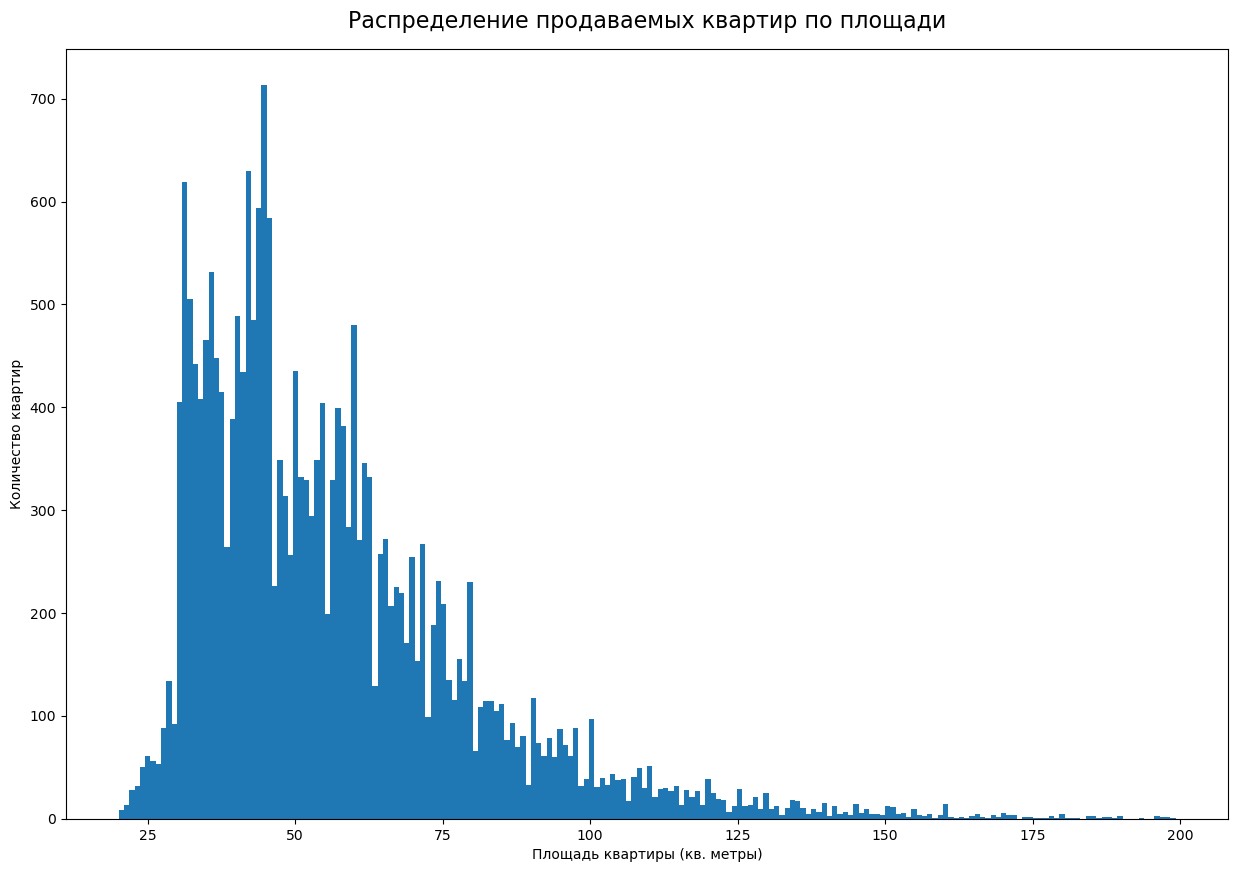

In [66]:
fig, ax = plt.subplots()

ax.hist(data['total_area'], bins=200)

fig.set_size_inches(15, 10)
ax.set_title('Распределение продаваемых квартир по площади', pad=15, fontsize=16)
ax.set_xlabel('Площадь квартиры (кв. метры)')
ax.set_ylabel('Количество квартир');

Заметны три группы квартир: площадью 30-36, 44-46 и 60 кв. метров. Возможно, это связано с количеством комнат, соответственно 1, 2 и 3 комнатные квартиры.

---

Скорее всего, более четко это мы увидим в распределении жилой площади.

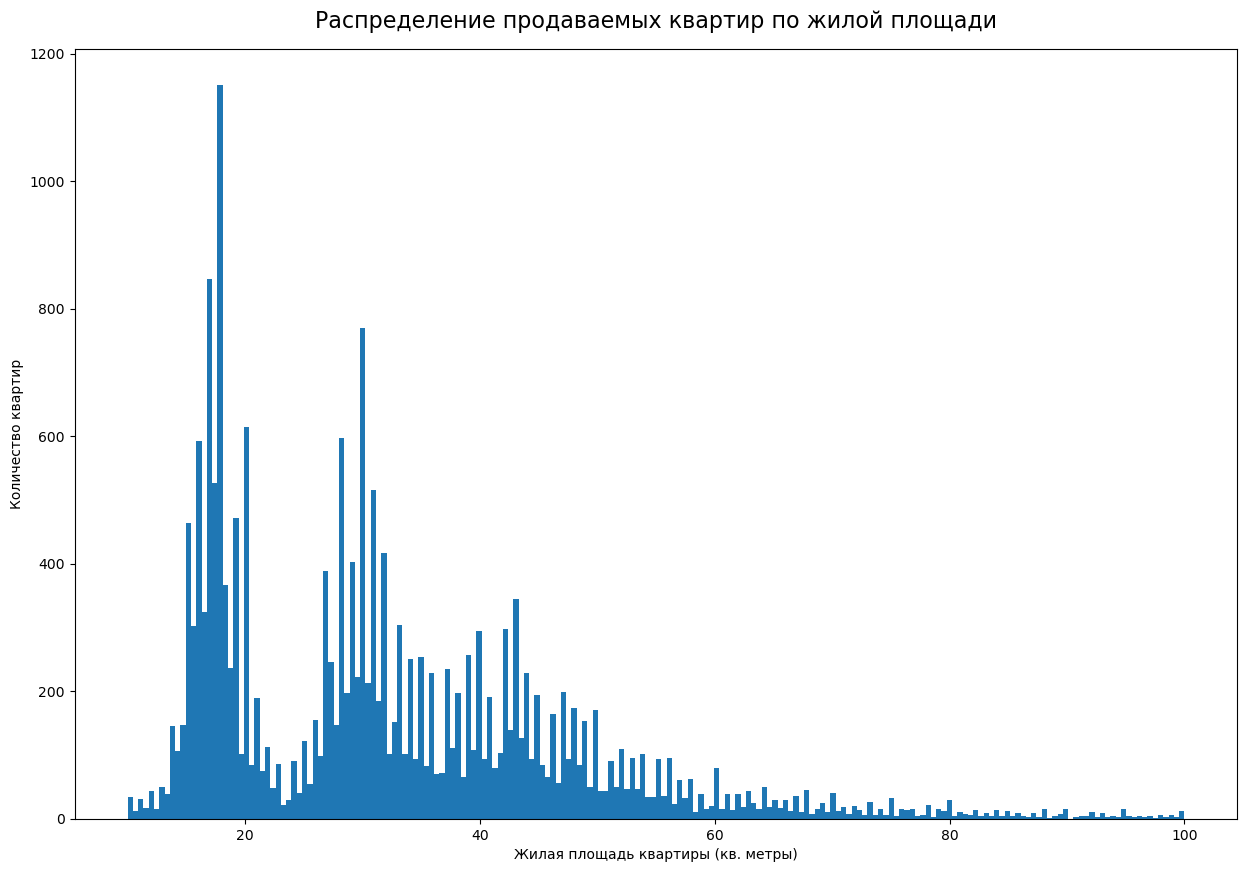

In [67]:
fig, ax = plt.subplots()

ax.hist(data['living_area'], bins=200)

fig.set_size_inches(15, 10)
ax.set_title('Распределение продаваемых квартир по жилой площади', pad=15, fontsize=16)
ax.set_xlabel('Жилая площадь квартиры (кв. метры)')
ax.set_ylabel('Количество квартир');

Действительно, тоже 3 явных пика. Причем заметно, что провал между 1- и 2-комнатными квартирами намного более четкий, чем между 2- и 3-комнатными. Видимо, площадь 1-комнатных квартир более унифицирована.

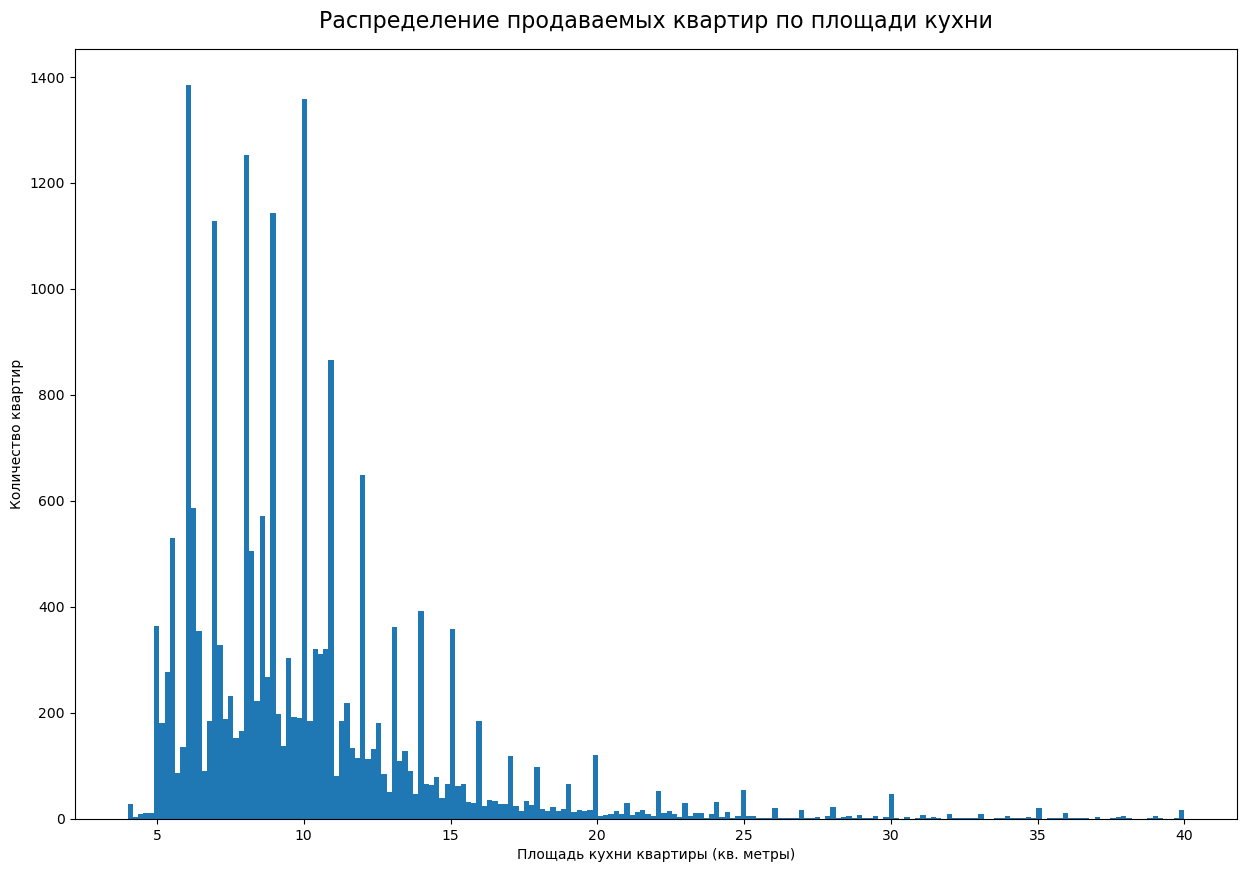

In [68]:
fig, ax = plt.subplots()

ax.hist(data['kitchen_area'], bins=200)

fig.set_size_inches(15, 10)
ax.set_title('Распределение продаваемых квартир по площади кухни', pad=15, fontsize=16)
ax.set_xlabel('Площадь кухни квартиры (кв. метры)')
ax.set_ylabel('Количество квартир');

С плащадью кухни все намного менее очевидно. Распределение довольно равномерное, хоть и далекое от стандартного, а ближе к распределению Пуассона. Интересно, что часто площадь кухни выражают целым числом.

---
Посмотрим на распределение цен.

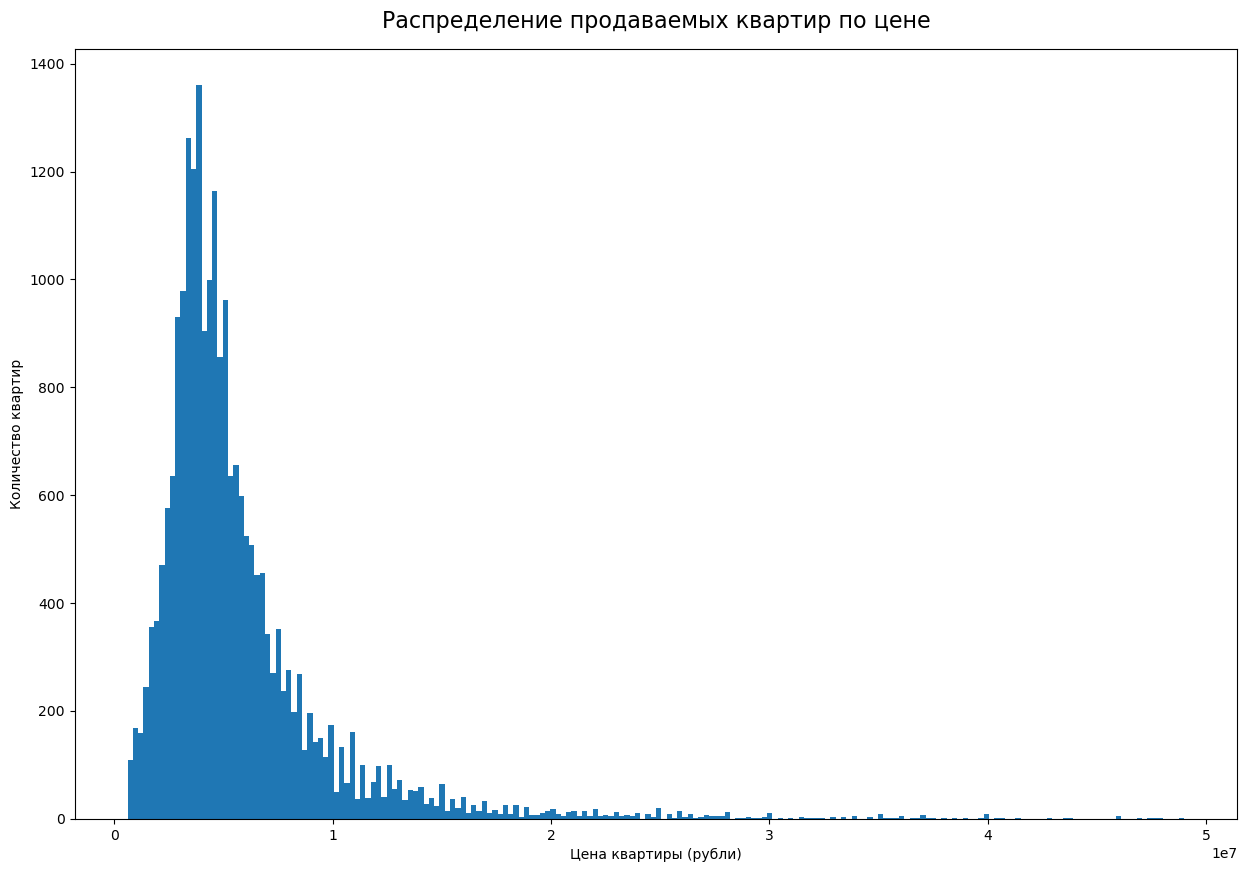

In [69]:
fig, ax = plt.subplots()

ax.hist(data['last_price'], bins=200)

fig.set_size_inches(15, 10)
ax.set_title('Распределение продаваемых квартир по цене', pad=15, fontsize=16)
ax.set_xlabel('Цена квартиры (рубли)')
ax.set_ylabel('Количество квартир');

Интересно, что в распределении цены квартир нет таких четких пиков по количеству комнат или площади. У этого параметра также довольно длинный хвост из высоких цен.

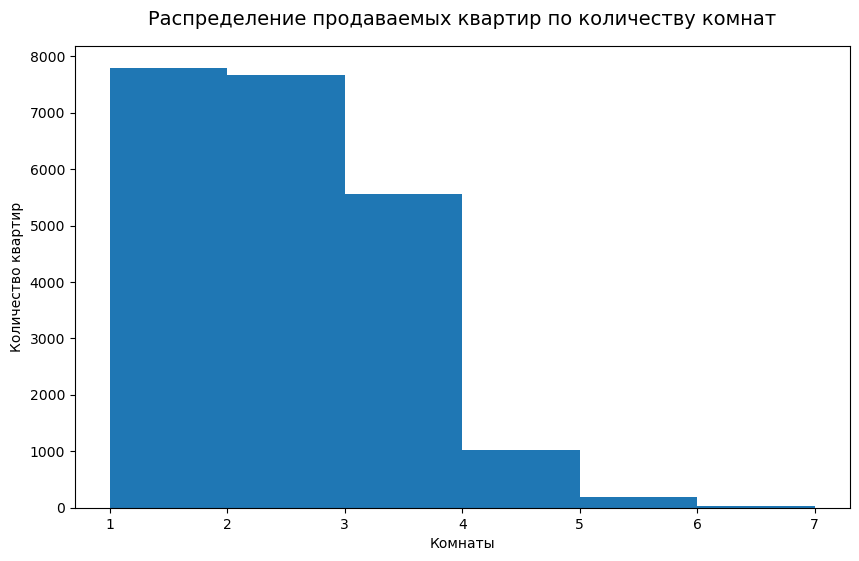

In [70]:
fig, ax = plt.subplots()

ax.hist(data['rooms'], bins=6, range=(1, 7))

fig.set_size_inches(10, 6)
ax.set_title('Распределение продаваемых квартир по количеству комнат', pad=15, fontsize=14)
ax.set_xlabel('Комнаты')
ax.set_ylabel('Количество квартир');

Одно и двух комнатных квартир почти одинаковое количество, правда вторых все же чуть меньше. Трехкомнатных меньше уже почти на четверть, а квартир с 4 комнатами и более совсем немного относительно общего количества.

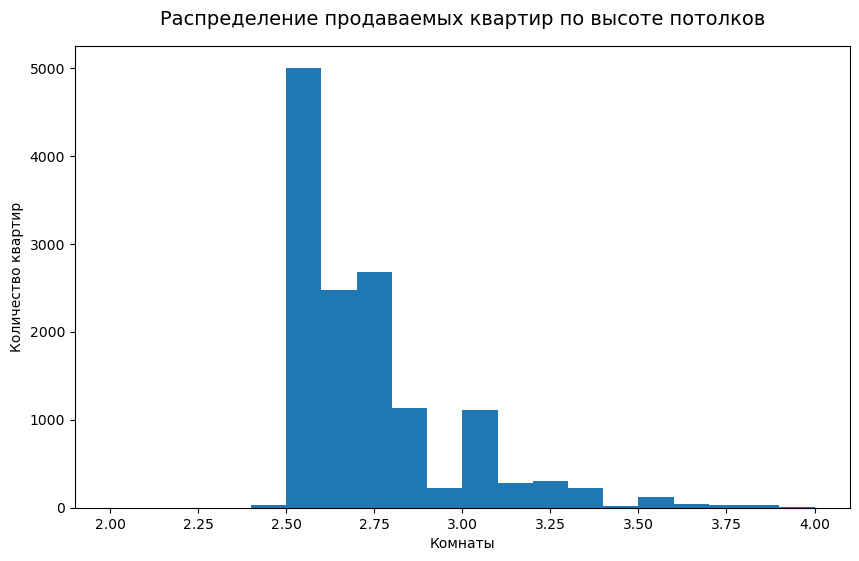

In [71]:
fig, ax = plt.subplots()

ax.hist(data['ceiling_height'], bins=20, range=(2, 4))

fig.set_size_inches(10, 6)
ax.set_title('Распределение продаваемых квартир по высоте потолков', pad=15, fontsize=14)
ax.set_xlabel('Комнаты')
ax.set_ylabel('Количество квартир');

В основном квартиры имеют высоту потолков между 2,5 и 2,9 м. Довольно много квартир с полтолками 3-3,1 м, а выше уже незначительное количество.

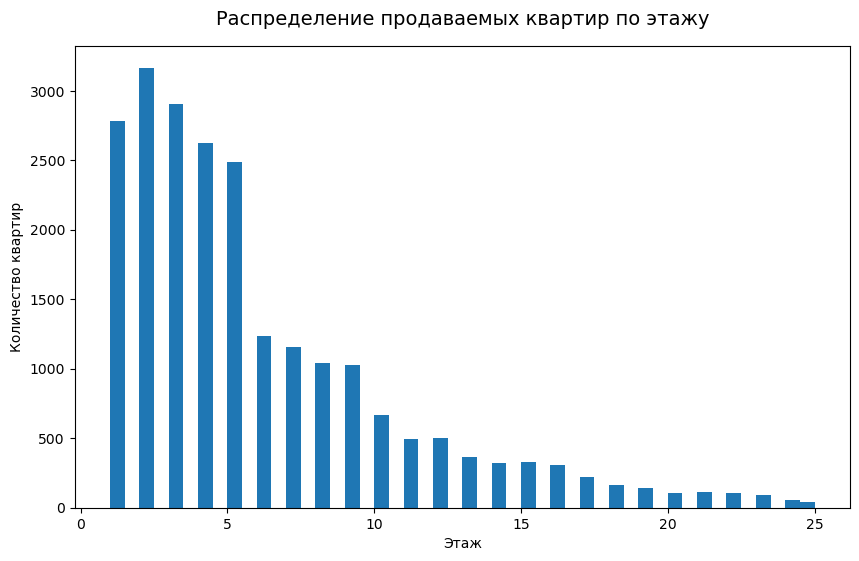

In [72]:
fig, ax = plt.subplots()

ax.hist(data['floor'], bins=48, range=(1, 25))

fig.set_size_inches(10, 6)
ax.set_title('Распределение продаваемых квартир по этажу', pad=15, fontsize=14)
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество квартир');

Основная доля квартир продается на 1-5 этажах. Вероятно это не новостройки, а старый фонд, где этажность была небольшая.

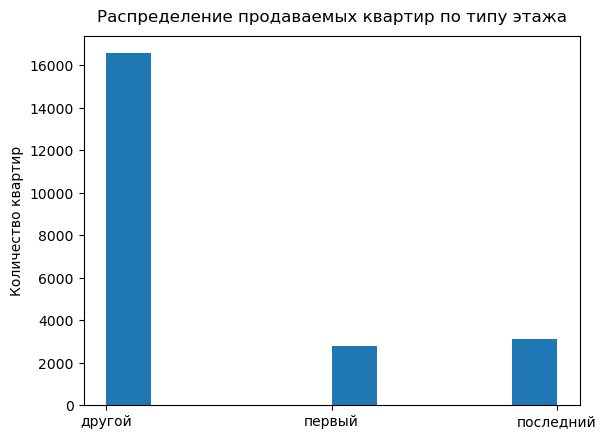

In [73]:
fig, ax = plt.subplots()

ax.hist(data['floor_type'])

ax.set_title('Распределение продаваемых квартир по типу этажа', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир');

Квартир на последнем этаже чуть больше, чем на первом. Интересно, с чем это связано?

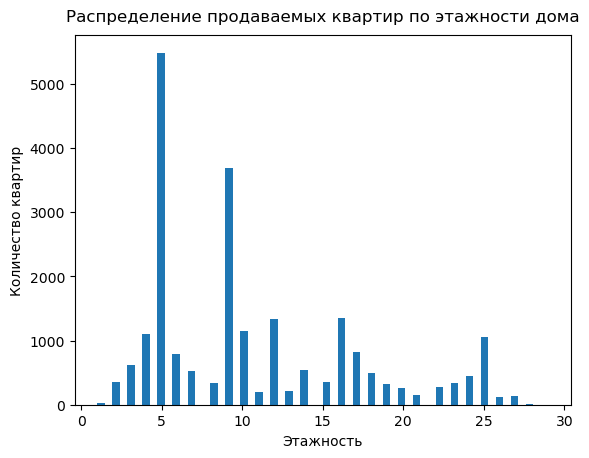

In [74]:
fig, ax = plt.subplots()

ax.hist(data['floors_total'], bins=60)

ax.set_title('Распределение продаваемых квартир по этажности дома', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир');
ax.set_xlabel('Этажность');

Заметны явные пики по домам стандартной этажности - 5, 9, 12, 16 и 25 этажей.

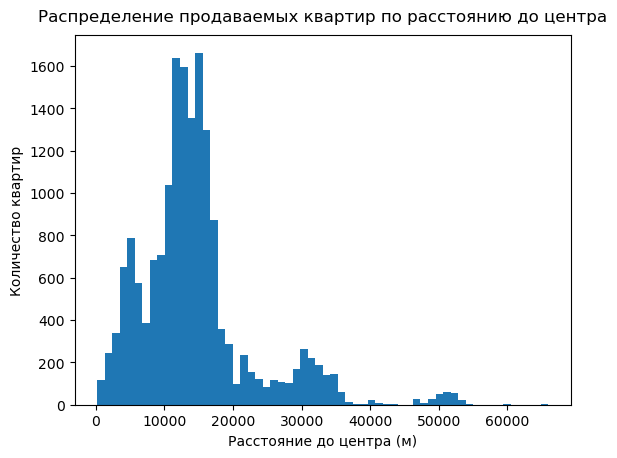

In [75]:
fig, ax = plt.subplots()

ax.hist(data['city_centers_nearest'], bins=60)

ax.set_title('Распределение продаваемых квартир по расстоянию до центра', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Расстояние до центра (м)');

Расстояние заметно дифференцировано. Существенная доля квартир близка к центру - около 4-5 км, основная часть удалена на 10-16 км, заметные максимумы на 30 и 50 км. Возможно, это связано с удаленностью основных районов и прогородов.

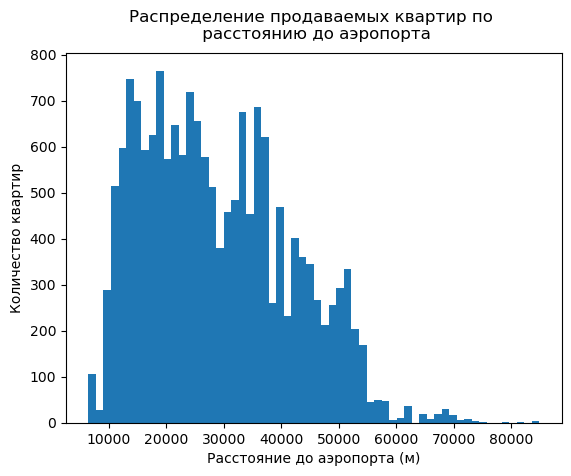

In [76]:
fig, ax = plt.subplots()

ax.hist(data['airports_nearest'], bins=60)

ax.set_title('Распределение продаваемых квартир по \n расстоянию до аэропорта', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Расстояние до аэропорта (м)');

Интересно, что от аэропорта квартиры удалены значительно более равномерно.

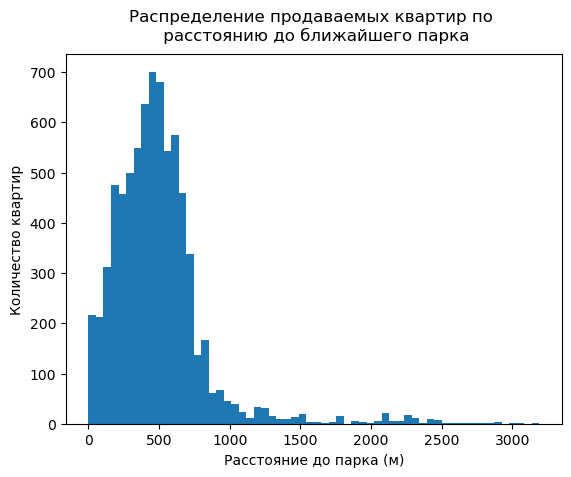

In [77]:
fig, ax = plt.subplots()

ax.hist(data['parks_nearest'], bins=60)

ax.set_title('Распределение продаваемых квартир по \n расстоянию до ближайшего парка', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Расстояние до парка (м)');

В Ленинградской области много парков - обычно от квартиры до ближайшего около полукилометра.

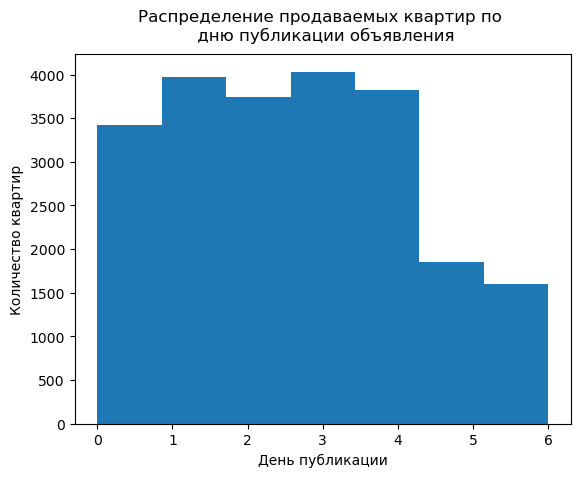

In [78]:
fig, ax = plt.subplots()

ax.hist(data['day_of_exposition'], bins=7)

ax.set_title('Распределение продаваемых квартир по \n дню публикации объявления', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('День публикации');

Объявления публикуют в рабочие дни. Возможно, это риэлторы. Максимум во вторник и четверг, и в целом к концу рабочей недели объявлений все больше. В выходные объявлений заметно ниже.

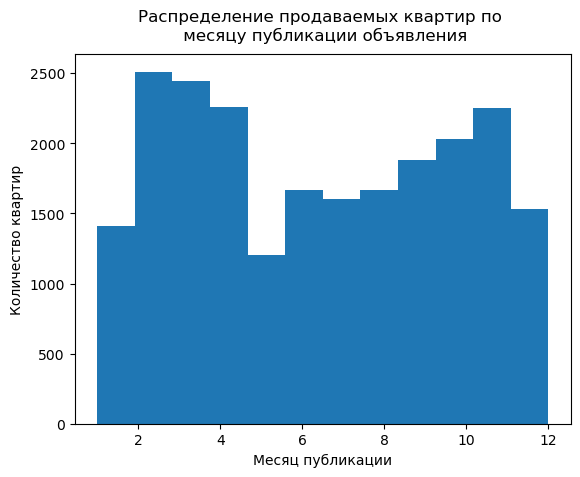

In [79]:
fig, ax = plt.subplots()

ax.hist(data['month_of_exposition'], bins=12)

ax.set_title('Распределение продаваемых квартир по \n месяцу публикации объявления', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Месяц публикации');

Меньше всего объявлений в мае и январе, и достаточно мало в декабре. Зимой продают реже, а вот почему такой провал к маю?  Летом количество объявление примерно равно, а вот к началу декабря растет. Пик значений приходится на февраль, и к маю количество постепенно снижается. 

То есть, видны 4 тренда: небольшое количество объявлений зимой, стабильное летом, падение весной и рост осенью.

**Вывод**: описали некоторые параметры.Часть распределений логично, но часть остается загадкой. Например, почему минимум новых объявлений приходится на май, а максимум на февраль, или почему распределение по цене такое равномерное, и не видно разницы между количеством комнат или площадью.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит смотреть на цифры и графики
        
Можно посмотреть на каждый февраль из нашей выборки, а затем на дни в этом феврале (который выбивается ...)

#### Изучение скорости продажи квартир

Посмотрим на гистограмму распределения квартир по скорости продажи.

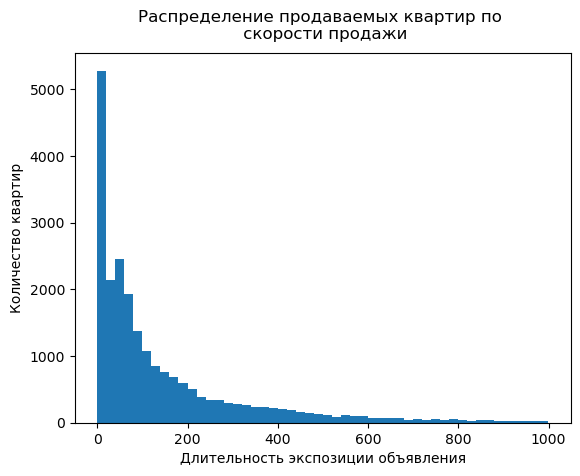

In [80]:
fig, ax = plt.subplots()

ax.hist(data['days_exposition'], bins=50)

ax.set_title('Распределение продаваемых квартир по \n скорости продажи', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Длительность экспозиции объявления');

Пока кажется, что обычно квартиры продаются быстрее, чем за 100 дней. Но стоит взглянуть более подробно на распределение в первой части (среди квартир, проданных менее чем за 100 дней).

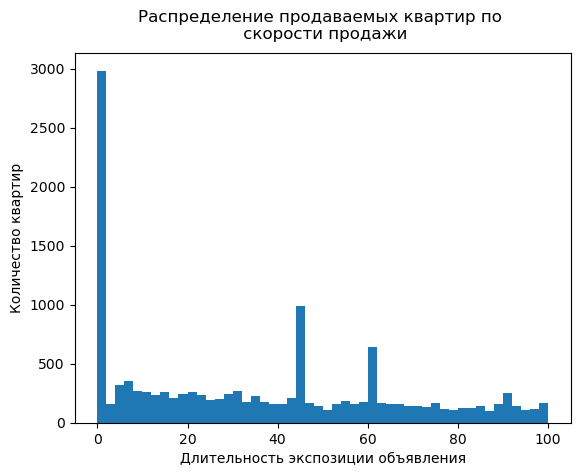

In [81]:
fig, ax = plt.subplots()

ax.hist(data['days_exposition'], bins=50, range=(0, 100))

ax.set_title('Распределение продаваемых квартир по \n скорости продажи', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Длительность экспозиции объявления');

Видно, что максимум продаж приходится на 0 день. То есть много объявлений снимают с продажи в этот же день. Мы заполнили пропуски в этом столбце нулями, возможно, это изменило статистику. Надо исключить 0 из гистограммы.

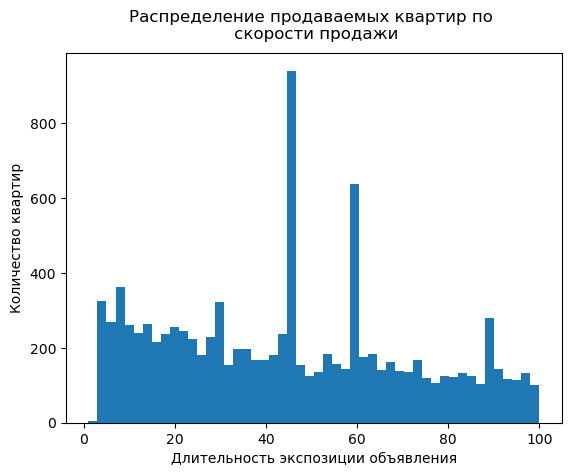

In [82]:
fig, ax = plt.subplots()

ax.hist(data['days_exposition'], bins=50, range=(1, 100))

ax.set_title('Распределение продаваемых квартир по \n скорости продажи', pad=10, fontsize=12)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Длительность экспозиции объявления');

Посмотрим на среднее и медиану распределения.

In [83]:
print('Среднее:', data[data['days_exposition'] != 0]['days_exposition'].mean())
print('Медиана:', data[data['days_exposition'] != 0]['days_exposition'].median())

Среднее: 165.38432318669473
Медиана: 92.0


Посчитаем 25-й и 75-й квантили для определения быстрых и медленных продаж.

In [84]:
data[data['days_exposition'] != 0]['days_exposition'].quantile([0.25, 0.5, 0.75])

0.25     44.0
0.50     92.0
0.75    217.0
Name: days_exposition, dtype: float64

Продажи за 44 дня можно считать быстрыми, а дольше 218 дней - медленными.

**Вывод**: распределение длительности продаж сильно смещенное. При медианном значении 92, среднее в 1.8 раза больше! Квартиры очень редко продаются в первые 2 дня. Интересно, что огромное количество объявлений закрывается примерно на 45, 60 и 90 дни. Вероятно, это связано с алгоритмами сервиса, которые предлагают изменить или удалить объявление, если по нему ничего не происходит (?). Видно примерная стабилизация продаж в районе 300-400 дней. После идет заметное падение количества объявлений.

Все продажи за 1,5 месяца можно считать быстрыми, а 7,5 месяцев и более - долгими.

Посмотрим на изменение скорости продажи квартир со временем

In [85]:
data[data['days_exposition'] != 0].pivot_table(index = 'year_of_exposition', values = ['days_exposition']).round()

,days_exposition
year_of_exposition,
2014,700.0
2015,538.0
2016,312.0
2017,157.0
2018,94.0
2019,31.0


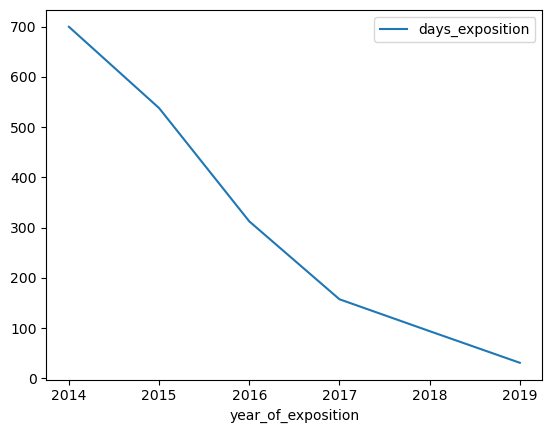

In [86]:
data[data['days_exposition'] != 0].pivot_table(index = 'year_of_exposition', values = ['days_exposition']).plot();

Интересно, что скорость продажи постоянно увеличивается.

#### Изучение факторов, влияющих на общую стоимость объекта

Построим вначале простые точечные диаграммы зависимости цены от общей площади `total_area`, жилой площади `living_area` и площади кухни `kitchen_area`.

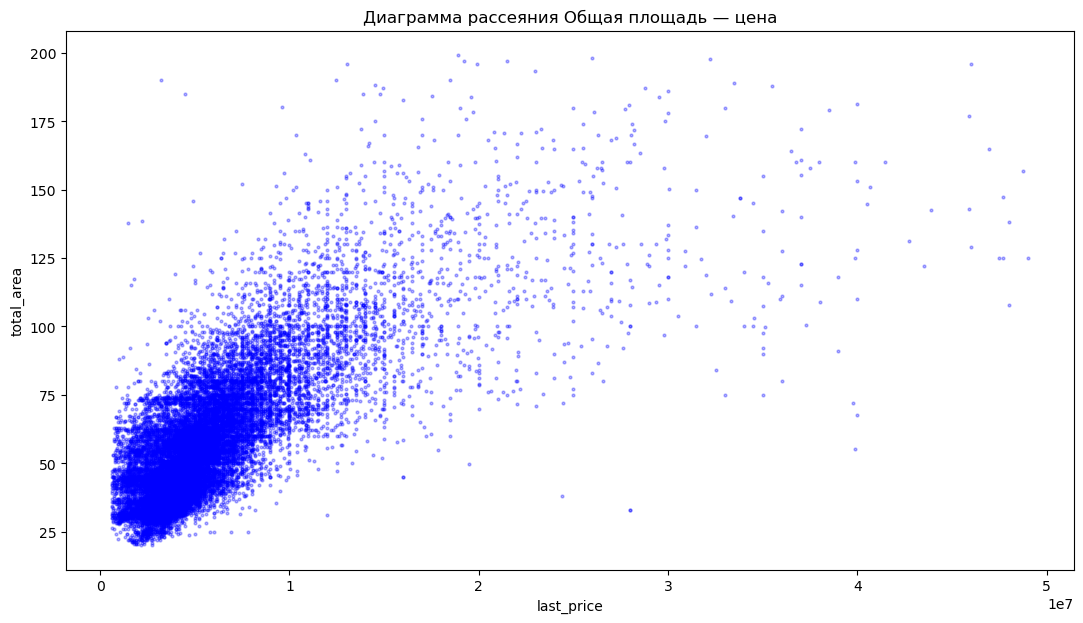

In [87]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, figsize=(13, 7), c = 'b', s = 4)
plt.title('Диаграмма рассеяния Общая площадь — цена');

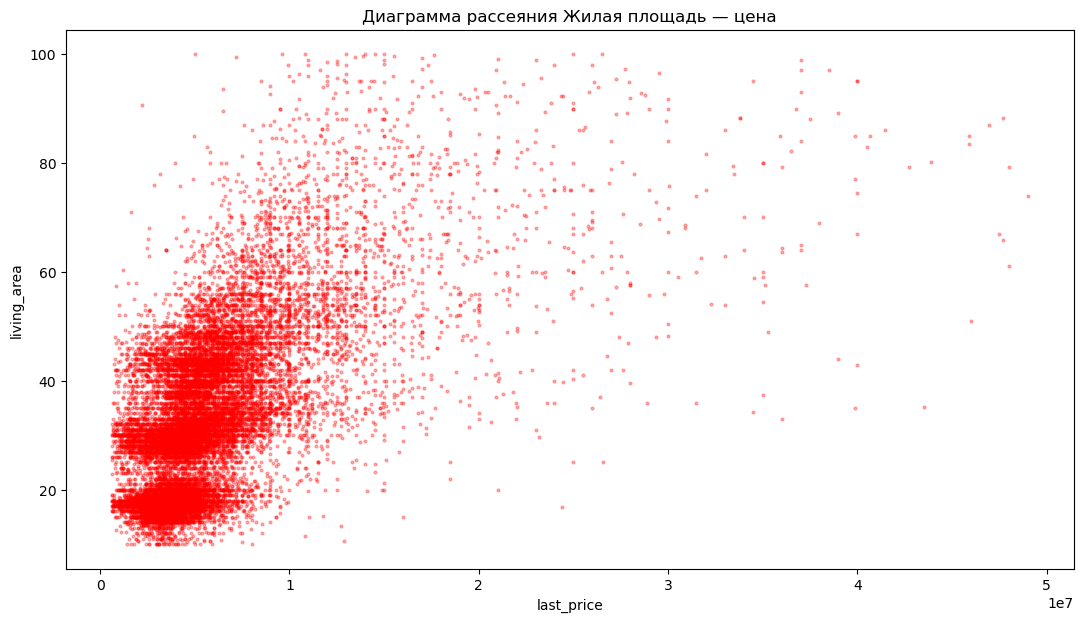

In [88]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize=(13, 7), c = 'r', s = 4)
plt.title('Диаграмма рассеяния Жилая площадь — цена');

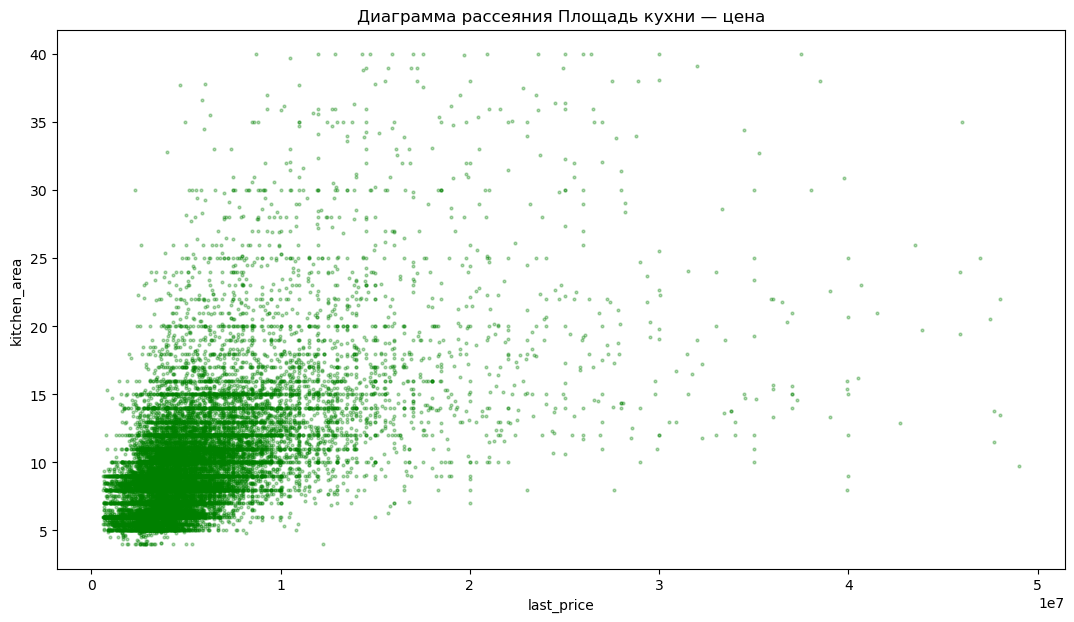

In [89]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(13, 7), c = 'g', s = 4)
plt.title('Диаграмма рассеяния Площадь кухни — цена');

Взаимосвязь очевидна: цена растет, когда растет площадь, корреляция прямая. Явно видно, что максимальная корреляция между стоимостью и общей площадью, чуть меньше между жилой площадью и стоимостью и самая слабая между площадью кухни и стоимостью. Данных достаточно, чтобы посчитать коэффициенты корреляции между этими параметрами, так что проверим вывод численно.

In [90]:
print('Коэффициент корреляции между стоимостью квартиры и общей площадью:', data['last_price'].corr(data['total_area']))
print('Коэффициент корреляции между стоимостью квартиры и жилой площадью:', data['last_price'].corr(data['living_area']))
print('Коэффициент корреляции между стоимостью квартиры и площадью кухни:', data['last_price'].corr(data['kitchen_area']))

Коэффициент корреляции между стоимостью квартиры и общей площадью: 0.7538359965790825
Коэффициент корреляции между стоимостью квартиры и жилой площадью: 0.6346600367389357
Коэффициент корреляции между стоимостью квартиры и площадью кухни: 0.5712981881110083


Результат совпадает с тем, что видно на графиках, только теперь мы можем оценить, насколько корреляция сильна. Видно, что корреляцию между стоимостью квартиры и ее площадью можно назвать высокой, а остальные - заметными.

---

Теперь попробуем изучить влияние количества комнат, этажа, на котором расположена квартира (первый, последний, другой) и даты размещения (день недели, месяц, год). Для этого воспользуемся сводными таблицами.

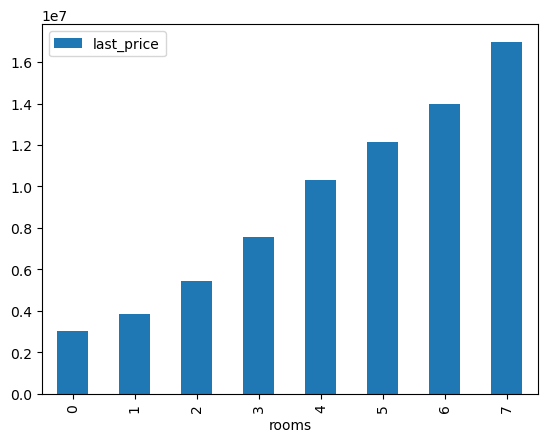

In [91]:
(
    data
    .pivot_table(index='rooms', values='last_price')
    .plot(kind='bar')
);

Посмотрим, сколько у нас вообще данных по разному количеству комнат, чтобы проверить представительность выборки.

In [92]:
data.groupby(['rooms'])['last_price'].count()

rooms
0     177
1    7799
2    7669
3    5568
4    1029
5     191
6      24
7       6
Name: last_price, dtype: int64

От 0 до 6 имеем количетство квартир от 100 и выше, по ним можно пытаться опредеить зависимости. Количество комнат явно влияет на цену, чем их больше, тем она выше. Правда рост цен нелинейный, разница между 0-1-2 небольшая, а между 2-3-4-5-6 уже значительная.

---
Проделаем тоже самое с этажностью. 

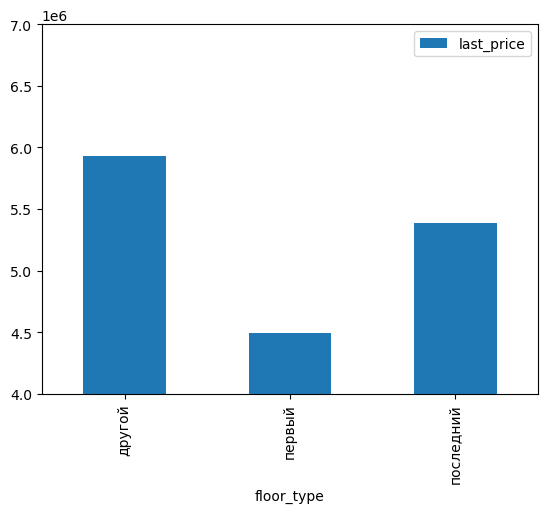

In [93]:
(
    data
    .pivot_table(index='floor_type', values='last_price')
    .plot(kind='bar', ylim=(4e6, 7e6))
);

In [94]:
data.groupby(['floor_type'])['last_price'].count()

floor_type
другой       16574
первый        2781
последний     3108
Name: last_price, dtype: int64

Квартиры на 1 этаже заметно дешевле, чем на любом другом. В среднем, стоимость цены на квартиру на последнем этаже чуть ниже, чем на остальных, кроме первого.

---

Осталось изучить влияние даты размещения.

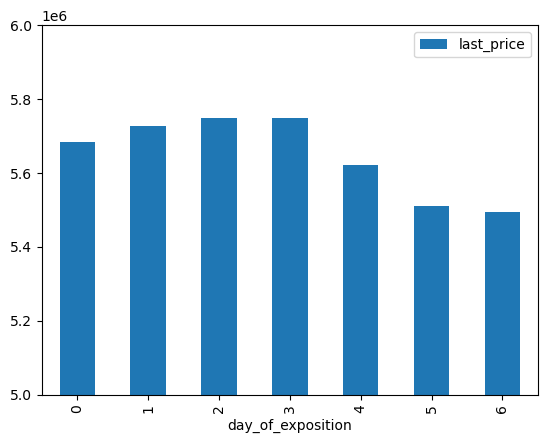

In [95]:
(
    data
    .pivot_table(index='day_of_exposition', values='last_price')
    .plot(kind='bar', ylim=(5e6, 6e6))
);

In [96]:
data.groupby(['day_of_exposition'])['last_price'].count()

day_of_exposition
0    3428
1    3973
2    3749
3    4034
4    3824
5    1853
6    1602
Name: last_price, dtype: int64

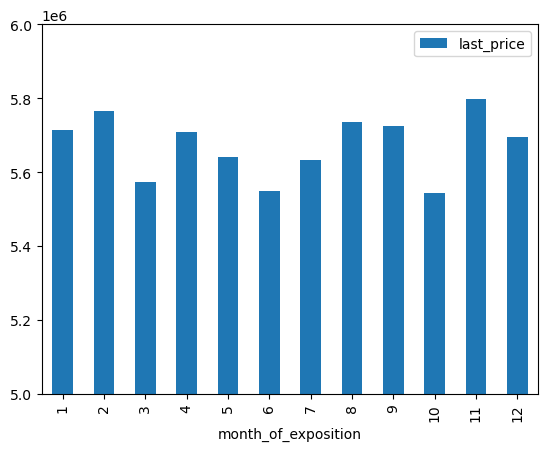

In [97]:
(
    data
    .pivot_table(index='month_of_exposition', values='last_price')
    .plot(kind='bar', ylim=(5e6, 6e6))
);

In [98]:
data.groupby(['month_of_exposition'])['last_price'].count()

month_of_exposition
1     1412
2     2512
3     2443
4     2258
5     1205
6     1670
7     1600
8     1668
9     1880
10    2029
11    2255
12    1531
Name: last_price, dtype: int64

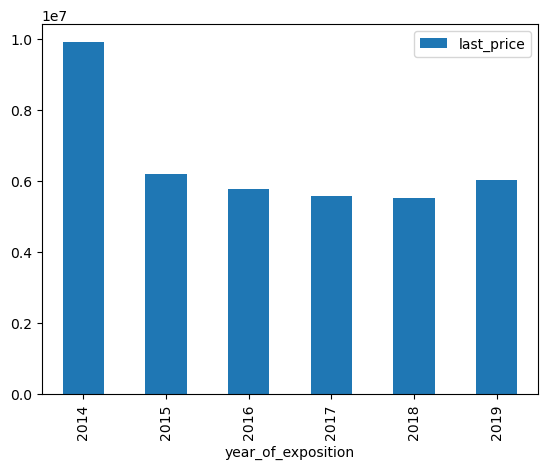

In [99]:
(
    data
    .pivot_table(index='year_of_exposition', values='last_price')
    .plot(kind='bar')
);

In [100]:
data.groupby(['year_of_exposition'])['last_price'].count()

year_of_exposition
2014      82
2015     903
2016    2618
2017    7855
2018    8234
2019    2771
Name: last_price, dtype: int64

В четверг выкладывают наиболее дорогие квартиры, а в выходные стоимость минимальна. Самые дешевые квартиры продают в октябре, июне и марте, а в ноябре - самые дорогие. С 2015 по 2018 год средняя стоимость квартир падала, достигнув минимума в 2018, а в 2019 снова пошла вверх. При этом, наибольшее количество объявлений о продаже было выложено в 2018 году, поэтому, падение цен логично - оно следует за расширением рынка.

Тренд средней стоимости совпадает с трендом средней площади продаваемых квартир, необходимо посмотреть тренд стоимость одного квадратного метра.

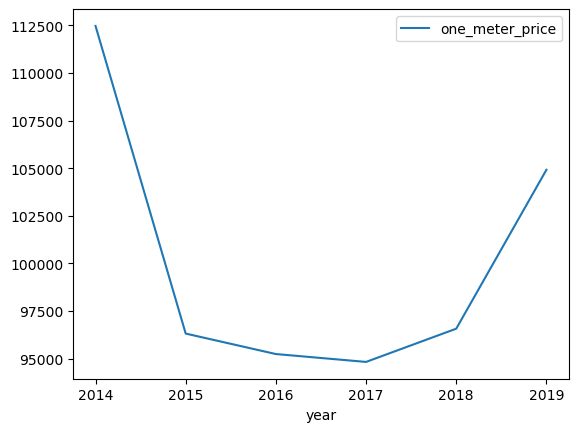

In [101]:
(
    pd.DataFrame(data={'one_meter_price': (data['last_price'] / data['total_area']),'year': data['year_of_exposition']})
    .groupby(['year'])
    .mean()
    .plot()
);

**Вывод:** наибольшим образом на цену квартиры влияет ее общая площадь, количество комнат (особенно если оно больше 3), нахождение на 1 этаже и дата размещения.

#### Стоимость квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

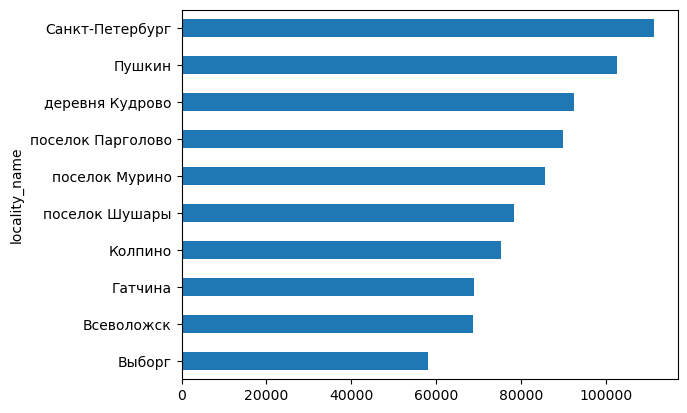

In [102]:
(
    data
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
    .sort_values(by=('count', 'square_meter_price'), ascending=False)
    .head(10)[('mean', 'square_meter_price')]
    .sort_values()
    .plot(kind='barh')
);

**Вывод:** наибольшая стоимость квадратного метра в г. Санкт-Петербург (что ожидаемо). Несильно меньше в Пушкине. Самый дешевый квадратный метр в Выборге - почти в 2 раза меньше Питера.

#### Средняя цена километра до центра в Питере

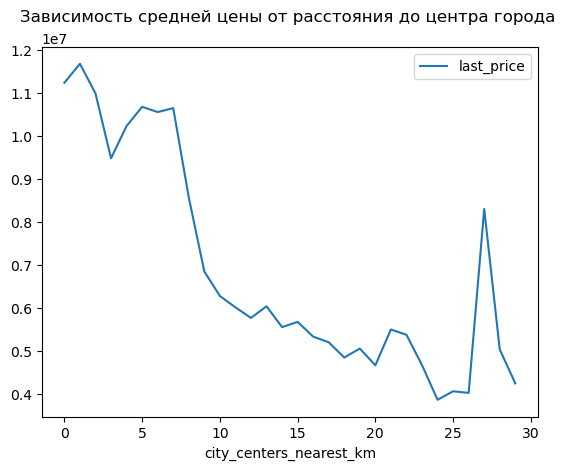

In [103]:
(
    data
    .loc[data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(title='Зависимость средней цены от расстояния до центра города \n')
);

In [104]:
data.loc[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest_km'].value_counts().sort_index()

0.0       12
1.0      151
2.0      240
3.0      298
4.0      597
5.0      775
6.0      535
7.0      376
8.0      553
9.0      575
10.0     698
11.0    1131
12.0    1573
13.0    1428
14.0    1247
15.0    1526
16.0    1239
17.0     844
18.0     253
19.0     152
20.0      18
21.0     115
22.0     201
23.0      82
24.0      26
25.0      26
26.0      43
27.0       2
28.0       7
29.0       6
Name: city_centers_nearest_km, dtype: int64

**Вывод:** цена квартир в самом центре (1 км) чрезвычайно высока. Затем она резко падает (до 3 км), но снова достигает максимума в районе 5-6 км. Затем снова резкое падение между 6 и 7 км, и в дальнейшем плавное уменьшение, за исключением локального максимума на 21-22 км (видимо, какой-то новый район). На расстоянии более 23 км квартир уже слишком мало для достоверных выводов.

### Общий вывод

В ходе исследования были изучены объявления о продаже квартир в Ленинградской области. Было обнаружено, что 
- меньше всего объявлений появляется в выходные дни, а также в мае и декабре;
- в основном продаются 1-2-3 комнатные квартиры;
- продаваемых квартир на последнем этаже больше, чем на первом;
- продажи за первые 44 дня можно назват быстрыми, а вот более 218 дней - медленными;
- стоимость квартиры сильно зависит от ее общей площади, этажа и количества комнат;
- в выходные, а также в октябре и июне выкладывают квартиры по меньшей цене, а вот в среду/четверг и в ноябре - по самой большой;
- цены падали до 2018 года, затем начался рост, что соответствует количеству публикуемых объявление, оно росло до 2018, затем резко упало;
- из крупных городов самый дорогой квадратный метр в Петербурге и Пушкине, а самый дешевый в Выборге;
- в самом центре продаются наиболее дорогие квартиры, стоимость квартир с удалением от центра уменьшается, но неравномерно. Есть локальные максимумы на 5-6 км и 21-22 км.